In [66]:
import scipy.io
import os
import glob 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import random
import collections
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
#edit local path
path = "C:\p9_data\P06\*"

plt.rcParams['figure.figsize'] = [20, 10]


# Notes

### short description of each column in the file, given minor investigation
    
    - '__header__' irrelevant and should be dropped
    - '__version__' irrelevant and should be dropped
    - '__globals__' unsure, might be variables in the .mat file
    - 'handle_arrow_rand' randomness array? just and array of 1s and 2s 
    - 'no_movements' holds array with integer 30
    - 'time_cue_on' formatted as a array of floats -> its a date and needs reformatting // 30 timestamps
    - 'time_cue_off' formatted as array of floats -> its a date and needs reformatting // 1219 timestamps
    - 'TriggerPoint' holds 61 timestamps
    - 'delay_T1' holds a constant 3 
    - 'delay_random_T1' holds a constant 2
    - 'delay_T2' holds a constant 0.1
    - 'sample_rate' likely Hz // holds constant 1200
    - 'time_window' holds a constant 3
    - 'no_time_windows' holds a constant 1000
    - 'filter_code_eeg' holds a constant 38 (could refer to what type of filter e.g. butterworth?)
    - 'time_start_device1' holds timestamp for when recording began
    - 'time_after_first_window' holds timestamp
    - 'time_after_last_window' holds timestamp
    - 'time_stop_device1' holds timestamp of when recording ended
    - 'data_device1' dataframe of 16 columns (likely 16 channels?, however mail stated 12 channels + 13th being EMG) size 405824x16 for cue_set1 and 446912x16 for cue_set2
    - 'time_axis_all_device1' potentially holds timestamps from recording start? has 1x402224 and 1x443312 shape for cue_set1 and cue_set2 respectively. (number of indices almost line up with data_device1)


### Load data

In [2]:
cue_sets = []

for file in glob.glob(path, recursive=True):
    cue_sets.append(scipy.io.loadmat(file))

In [67]:
cue_set_01 = cue_sets[0]
cue_set_02 = cue_sets[1]

In [4]:
counter = 1
for cue_set in cue_sets:
    
    print(f' # # - cue_set_{counter} - # # ')
    keys = cue_set.keys()
        
    data = []
    for key in keys:
        data.append(cue_set[key])
        
    
    print(data)
    counter += 1 


 # # - cue_set_1 - # # 
[b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Oct 24 13:31:10 2017', '1.0', ['handle_arrow_rand', 'no_movements', 'time_cue_on', 'time_cue_off', 'TriggerPoint'], array([[1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2,
        2, 2, 2, 1, 1, 2, 1, 2]], dtype=uint8), array([[30]], dtype=uint8), array([[2017.   ,   10.   ,   24.   ,   13.   ,   25.   ,   25.077],
       [2017.   ,   10.   ,   24.   ,   13.   ,   25.   ,   36.549],
       [2017.   ,   10.   ,   24.   ,   13.   ,   25.   ,   48.128],
       [2017.   ,   10.   ,   24.   ,   13.   ,   25.   ,   58.575],
       [2017.   ,   10.   ,   24.   ,   13.   ,   26.   ,    8.994],
       [2017.   ,   10.   ,   24.   ,   13.   ,   26.   ,   19.368],
       [2017.   ,   10.   ,   24.   ,   13.   ,   26.   ,   30.843],
       [2017.   ,   10.   ,   24.   ,   13.   ,   26.   ,   41.241],
       [2017.   ,   10.   ,   24.   ,   13.   ,   26.   ,   51.118],
       [2017.   ,   10.   ,   24

In [5]:
data_pd = pd.DataFrame(cue_set_01['data_device1'])

data_pd

0         1         2         3         4         5         6  \
0       0.000258  0.000272  0.000064  0.000609  0.000055  0.000257 -0.000007   
1       0.052644  0.007779 -0.013178 -0.011900 -0.009890  0.004895 -0.011826   
2      -0.018937 -0.006850 -0.014828 -0.012735 -0.016893 -0.011796 -0.016083   
3      -0.017449 -0.009423 -0.020752 -0.019010 -0.024620 -0.015835 -0.023497   
4      -0.019193 -0.009692 -0.021968 -0.019929 -0.025658 -0.016586 -0.024548   
...          ...       ...       ...       ...       ...       ...       ...   
405819 -0.017999 -0.009966 -0.018244 -0.020071 -0.026619 -0.016393 -0.022933   
405820 -0.018010 -0.009973 -0.018249 -0.020080 -0.026629 -0.016405 -0.022943   
405821 -0.018020 -0.009980 -0.018257 -0.020077 -0.026634 -0.016416 -0.022952   
405822 -0.018037 -0.009989 -0.018272 -0.020077 -0.026638 -0.016420 -0.022953   
405823 -0.018042 -0.009995 -0.018276 -0.020074 -0.026642 -0.016424 -0.022955   

               7         8         9        10        11        12        13  \
0      -0.000099 -0.000308  0.000339  0.000280  0.000032  0.000079  0.000185   
1      -0.014831 -0.051013  0.052730  0.143087  0.052914 -0.034878 -0.053215   
2      -0.008713 -0.001338 -0.008554  0.177096  0.185288  0.006653 -0.047167   
3      -0.013807 -0.008897 -0.002519  0.246563  0.245063 -0.026257 -0.035837   
4      -0.014334 -0.008702 -0.003762  0.260248  0.259745 -0.043538 -0.024397   
...          ...       ...       ...       ...       ...       ...       ...   
405819 -0.012371 -0.009561 -0.004790  0.247545  0.247177  0.058031 -0.138931   
405820 -0.012383 -0.009570 -0.004801  0.247942  0.247574  0.048608 -0.129188   
405821 -0.012391 -0.009573 -0.004793  0.249757  0.249391  0.036568 -0.112828   
405822 -0.012395 -0.009573 -0.004794  0.251253  0.250888  0.019876 -0.093358   
405823 -0.012398 -0.009571 -0.004800  0.252799  0.252435  0.000201 -0.070767   

              14        15  
0       0.000011  0.000299  
1      -0.020476  0.021011  
2      -0.014965 -0.040797  
3      -0.030295 -0.040202  
4      -0.029768 -0.046494  
...          ...       ...  
405819  0.000381 -0.088700  
405820 -0.002052 -0.085681  
405821 -0.007677 -0.077072  
405822 -0.013501 -0.069212  
405823 -0.018614 -0.061896  

[405824 rows x 16 columns]

In [6]:
pd.DataFrame(cue_set_01['time_axis_all_device1'])

0         1         2       3         4         5       6         7       \
0     3.0  3.000833  3.001667  3.0025  3.003333  3.004167   3.005  3.005833   

     8       9       ...      402214      402215  402216      402217  \
0  3.006667  3.0075  ...  338.178333  338.179167  338.18  338.180833   

       402218    402219      402220      402221   402222      402223  
0  338.181667  338.1825  338.183333  338.184167  338.185  338.185833  

[1 rows x 402224 columns]

### Investigating the data

Plotting everything at once is obviously impossible to analyse and gauge. 

<Figure size 1440x720 with 0 Axes>

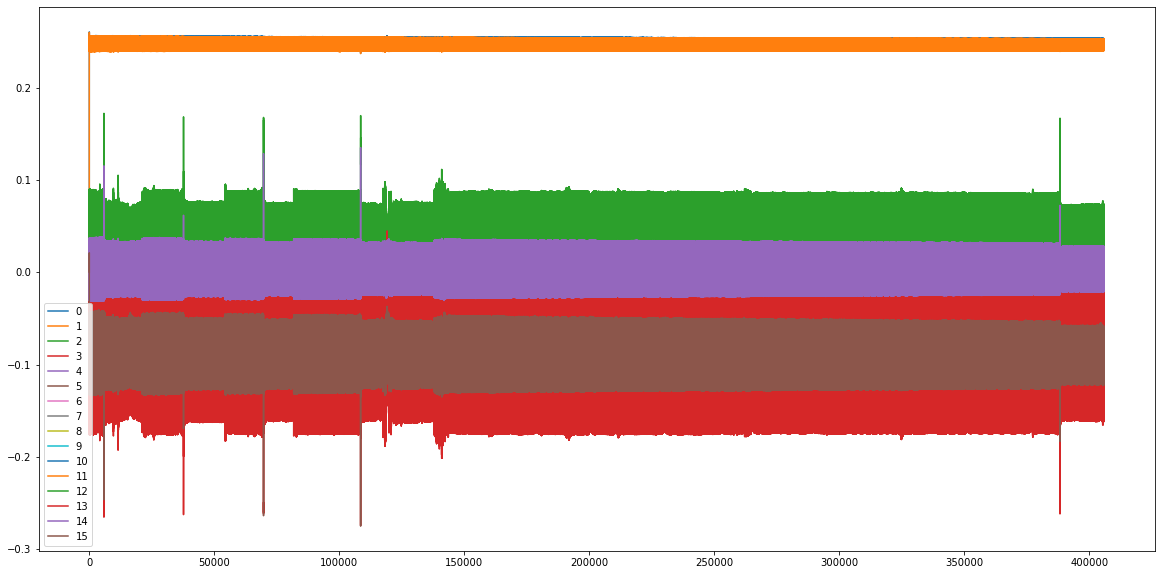

In [7]:
plt.figure()
data_pd.plot()

However, taking random subset of the data shows that majority of channels are unused. Experiment further with this to validate findings. 

Channels 0, 1, 12, 13, 14 and 15 seem to be the only relevant ones. (Channel 0 follows channel 1 almost perfectly, so could be redudant)

It was stated in the e-mail that channel was EGM, that however doesnt really seem to add up here as these look like regular EEG values. 


<Figure size 1440x720 with 0 Axes>

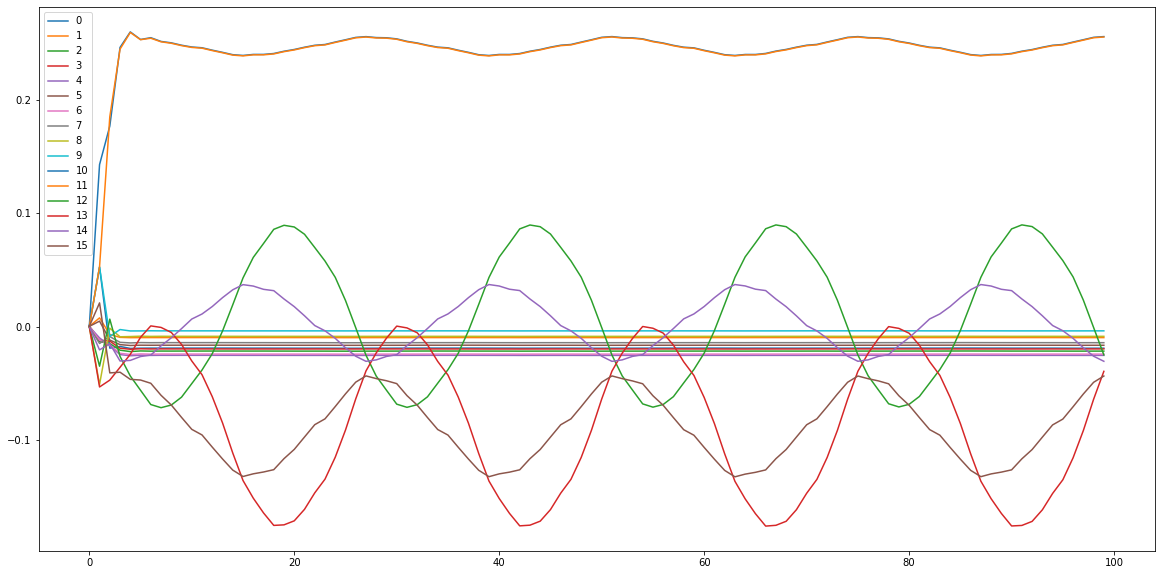

In [8]:
plt.figure()
data_pd.iloc[0:100].plot()

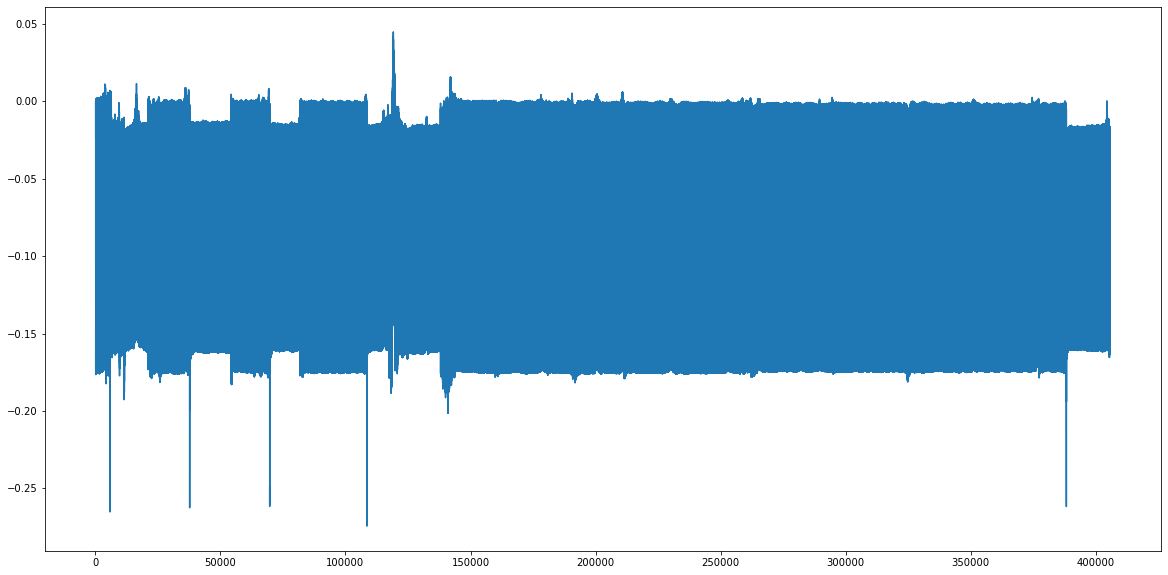

In [9]:
data_pd[13].iloc[100:].plot()

<Figure size 1440x720 with 0 Axes>

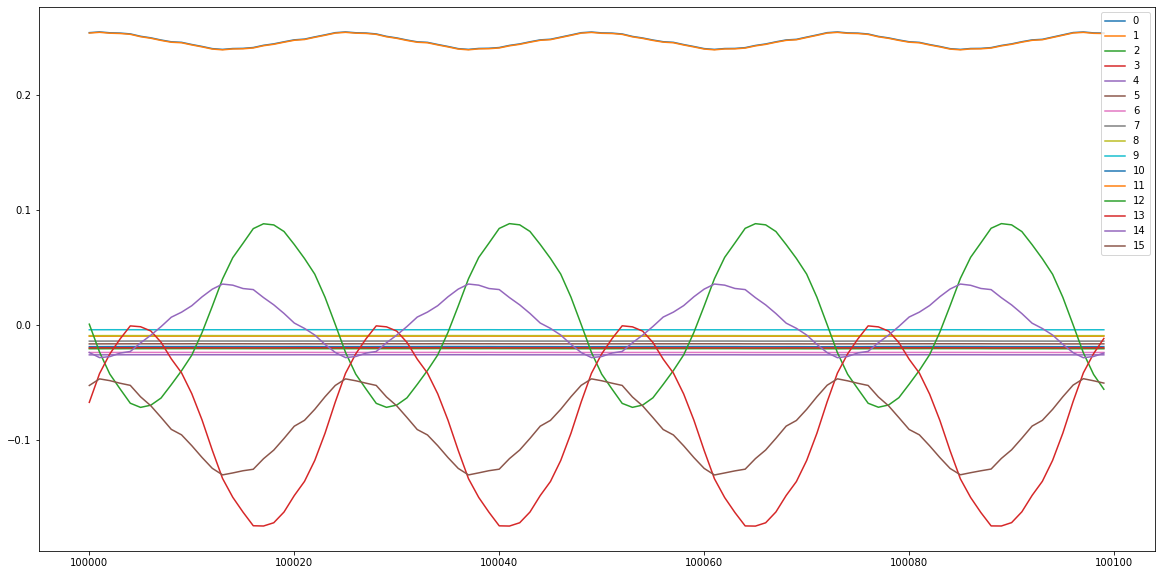

In [10]:
plt.figure()
data_pd.iloc[100000:100100].plot()

## Finding a on cue time


trying to find a timeframe of whenever a cue appears in the dataset based on the timestamps given.

In [11]:
# Given we're recoding a 1200 Hz - we conclude that we can divide row numbers by sample_frequency and get the timeframe in seconds
frequency = cue_set_01['sample_rate'][0][0]

sec_recoding = data_pd.shape[0] / frequency 

sec_recoding

338.18666666666667

In [12]:
time_start = cue_set_01['time_start_device1']
cue_on = cue_set_01['time_cue_on']
cue_off = cue_set_01['time_cue_off']

cue_01 = np.subtract(cue_on[0], time_start)
cue_01

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   , 23.996]])

In [13]:
cue_01_off = np.subtract(cue_off[0], time_start)
cue_01_off

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   , 28.646]])

Based on these two values we try and crop the data in this timeframe

In [14]:
start = int(cue_01[0][-1] * frequency)
end = int(cue_01_off[0][-1] * frequency) 

<Figure size 1440x720 with 0 Axes>

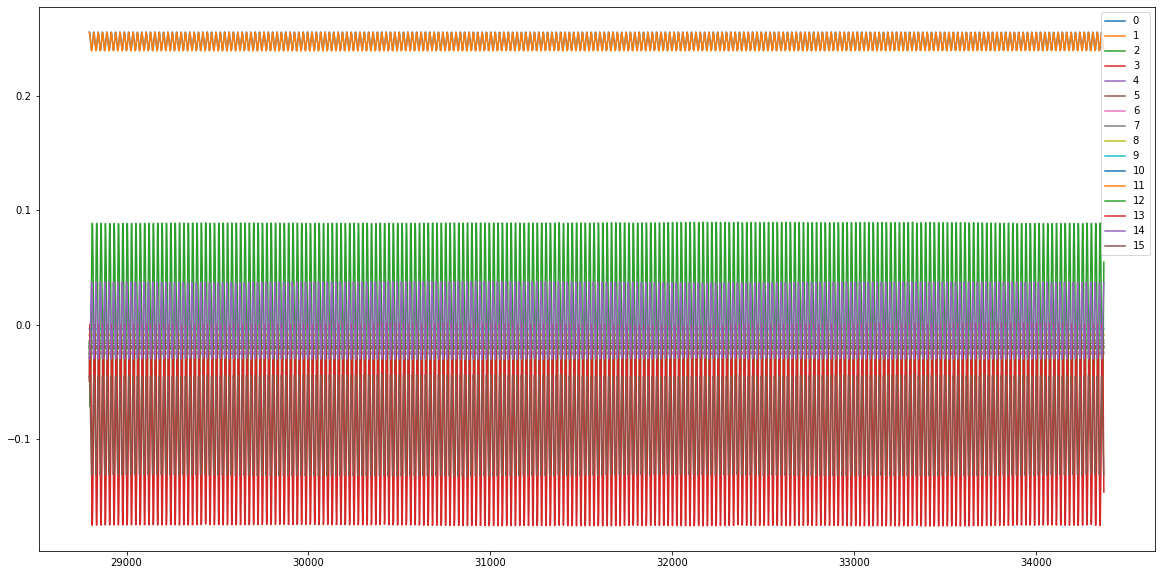

In [15]:
plt.figure()
data_pd.iloc[start:end].plot() 

It is very difficult to see anything, instead we break it down in individual channels.

In [16]:
trigger_points = cue_set_01['TriggerPoint']

cue_trigger_point = np.subtract(trigger_points[1][1:], time_start)

pd.DataFrame(trigger_points)

0       1     2     3     4     5       6
0   0.0  2017.0  10.0  24.0  13.0  24.0  49.137
1   1.0  2017.0  10.0  24.0  13.0  25.0  27.398
2   0.0  2017.0  10.0  24.0  13.0  25.0  29.733
3   1.0  2017.0  10.0  24.0  13.0  25.0  38.909
4   0.0  2017.0  10.0  24.0  13.0  25.0  41.223
..  ...     ...   ...   ...   ...   ...     ...
56  0.0  2017.0  10.0  24.0  13.0  30.0  12.672
57  1.0  2017.0  10.0  24.0  13.0  30.0  20.826
58  0.0  2017.0  10.0  24.0  13.0  30.0  23.061
59  1.0  2017.0  10.0  24.0  13.0  30.0  31.412
60  0.0  2017.0  10.0  24.0  13.0  30.0  33.656

[61 rows x 7 columns]

In [17]:
time_start

array([[2.017e+03, 1.000e+01, 2.400e+01, 1.300e+01, 2.500e+01, 1.081e+00]])

In [18]:
start_trigger = int(cue_trigger_point[0][-1] * frequency)

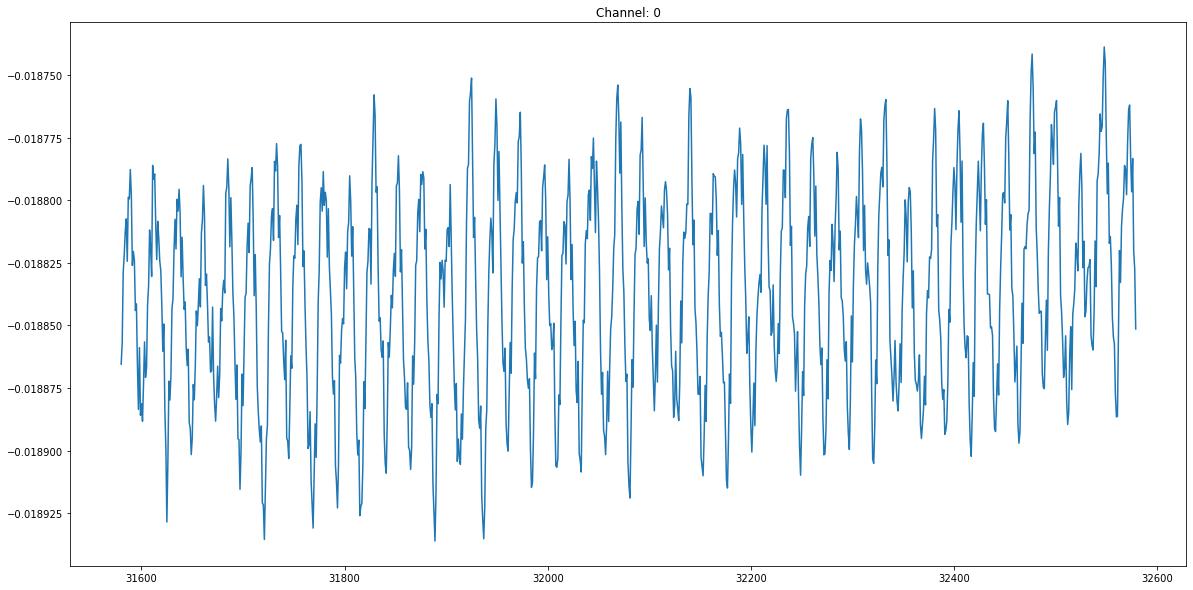

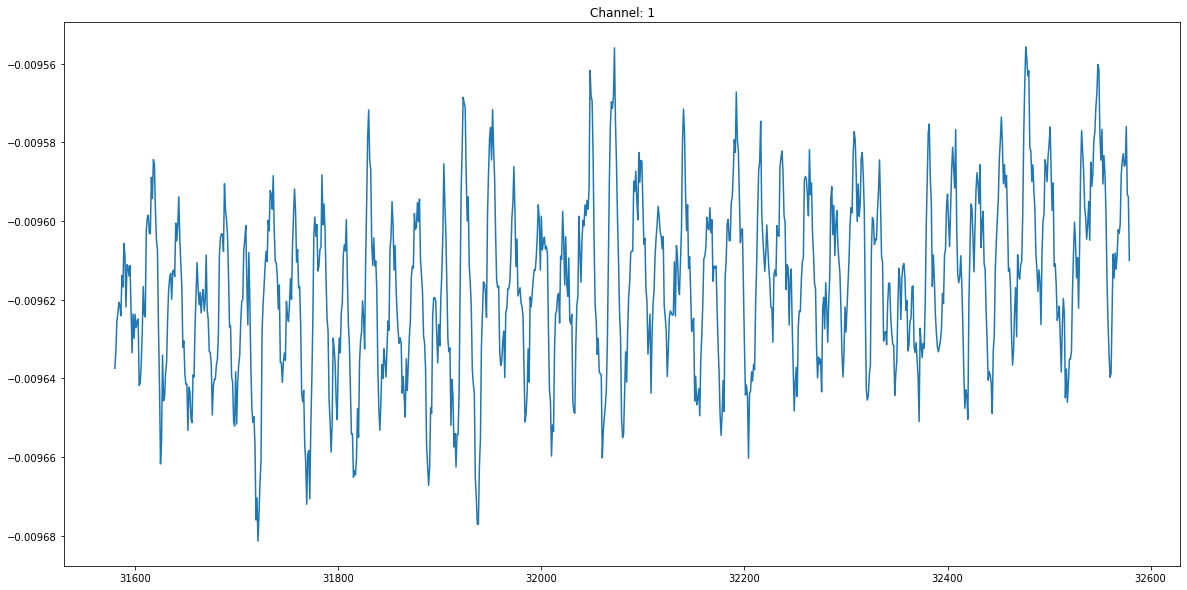

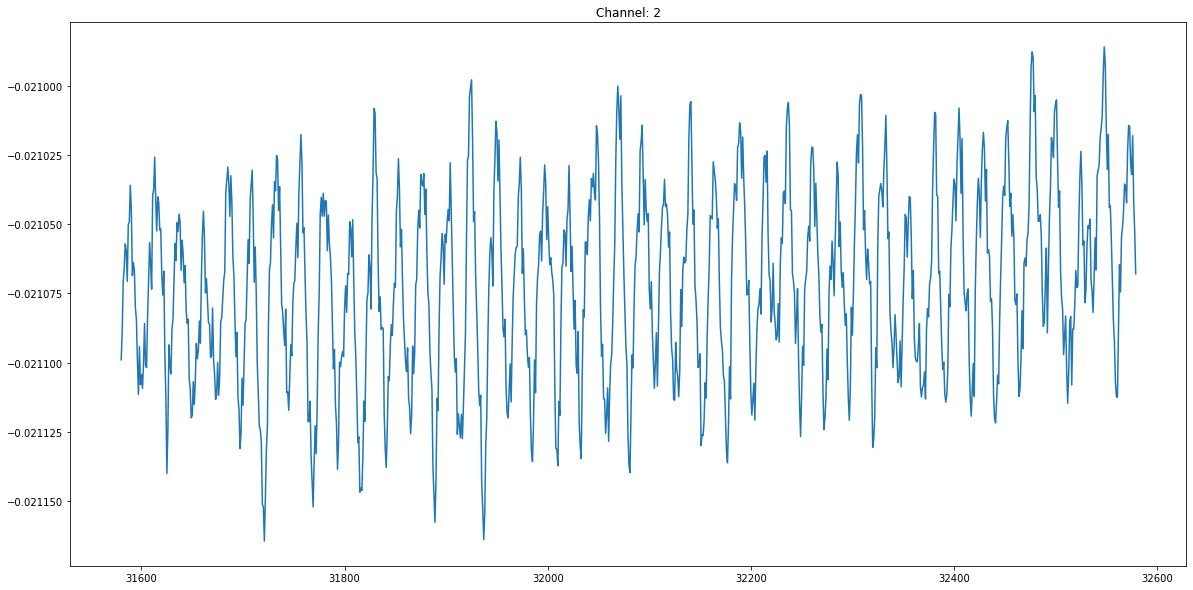

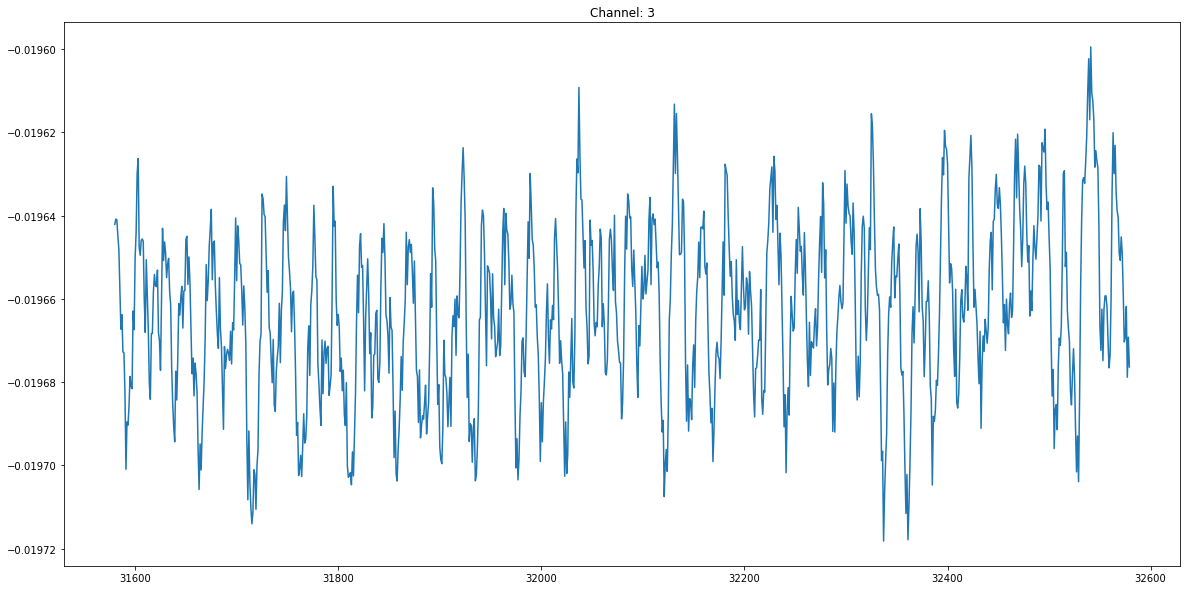

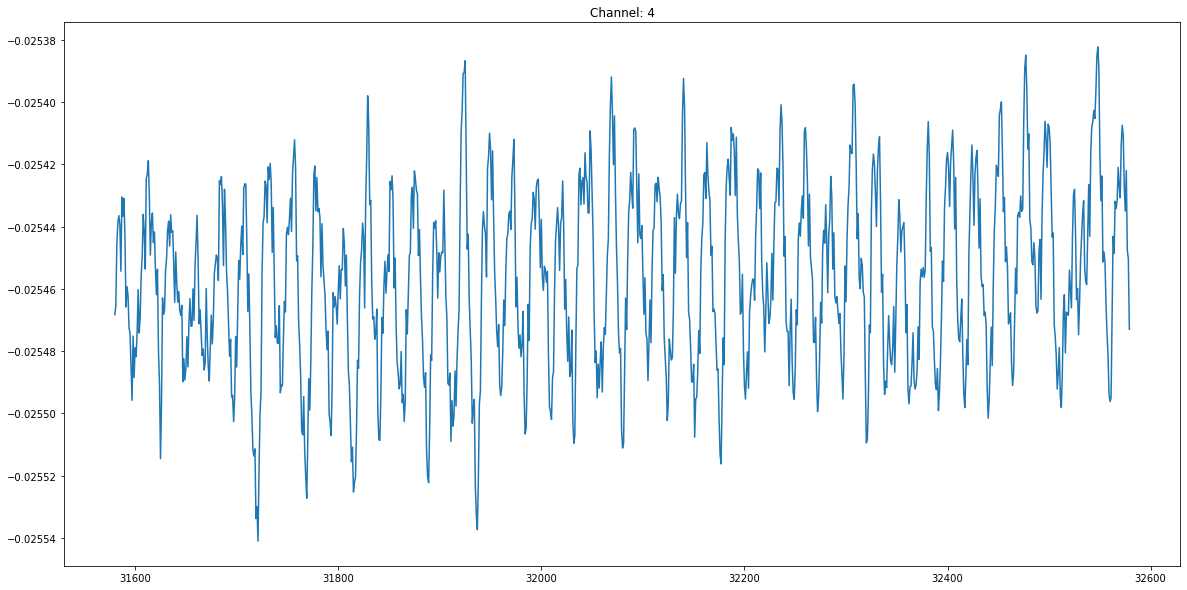

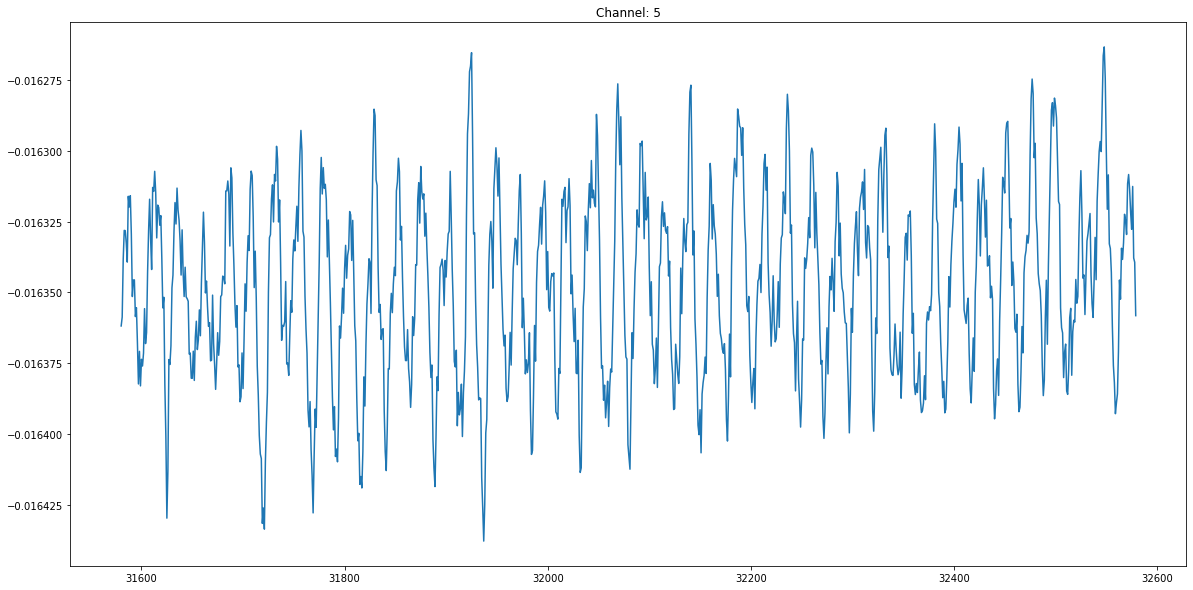

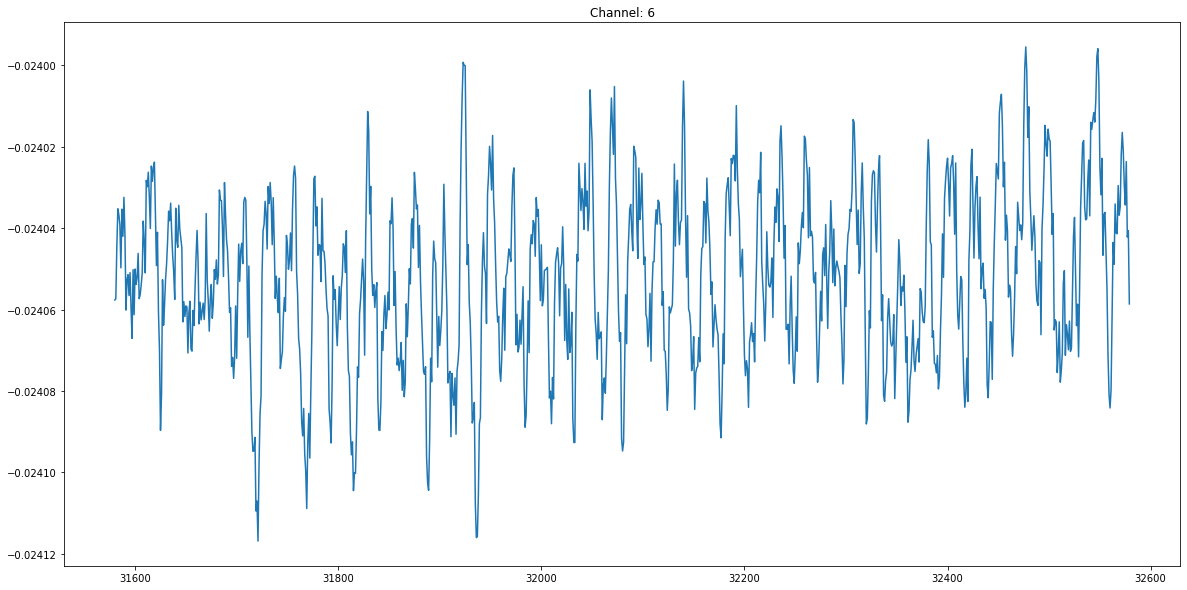

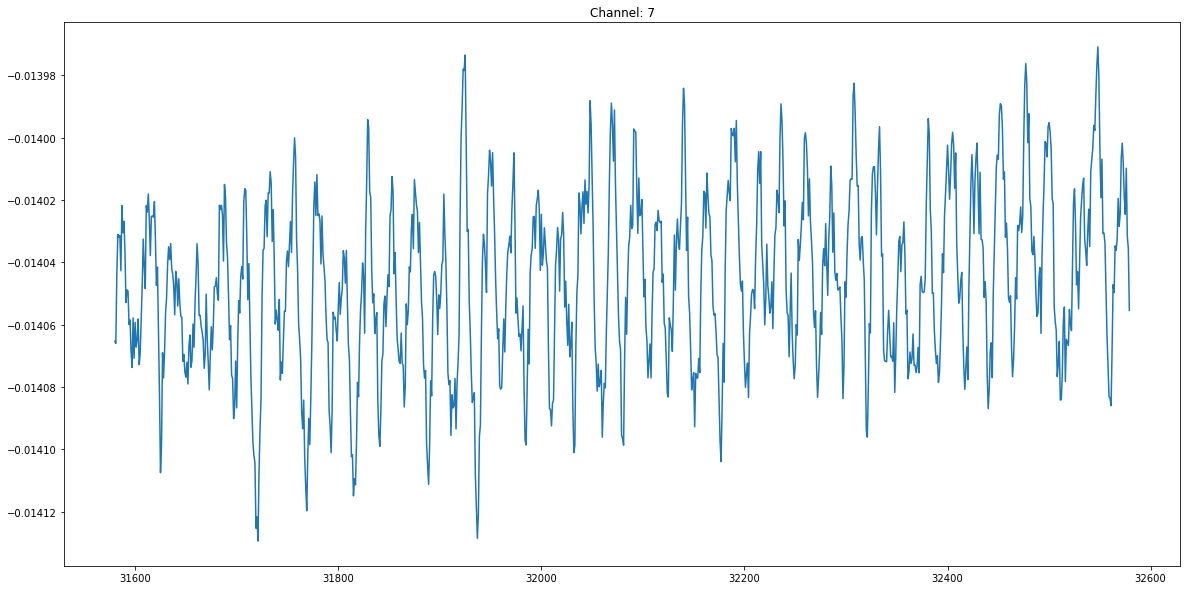

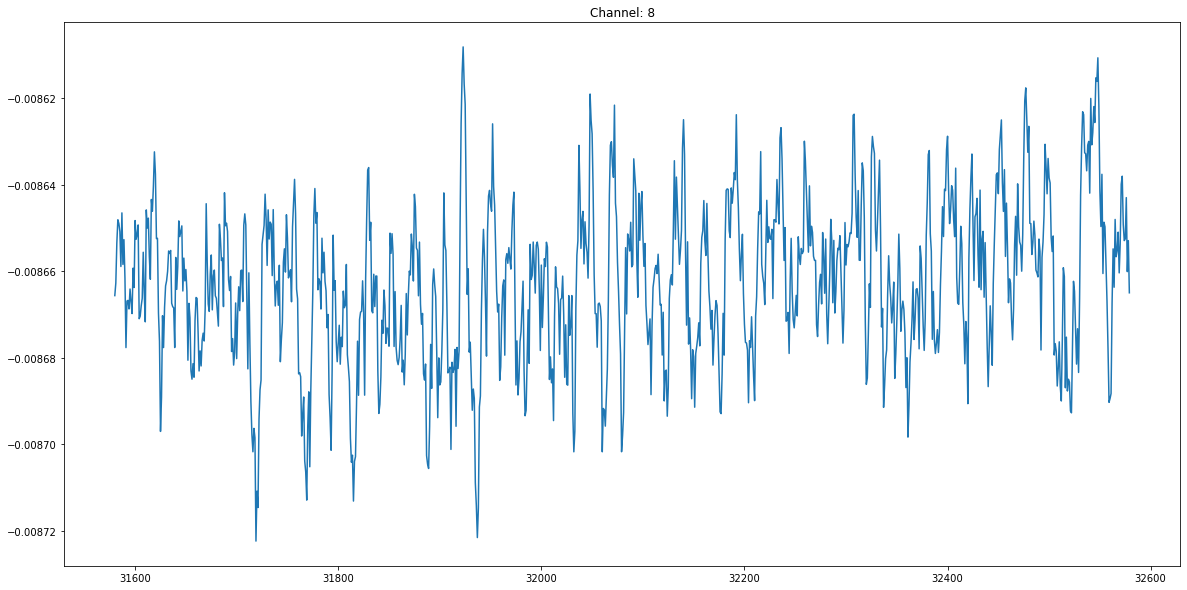

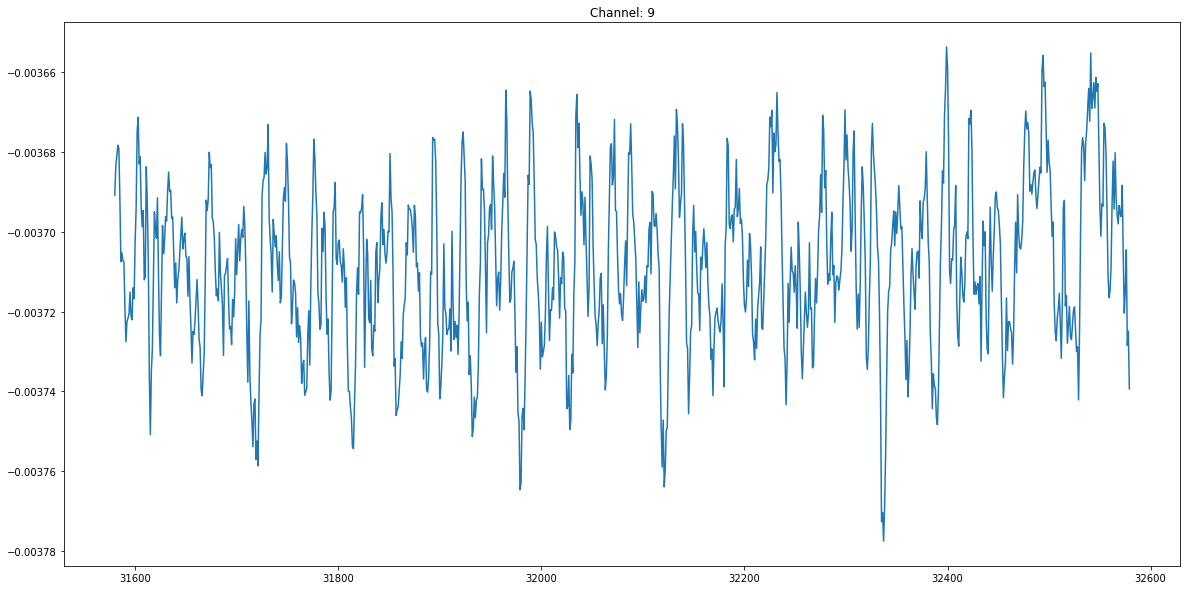

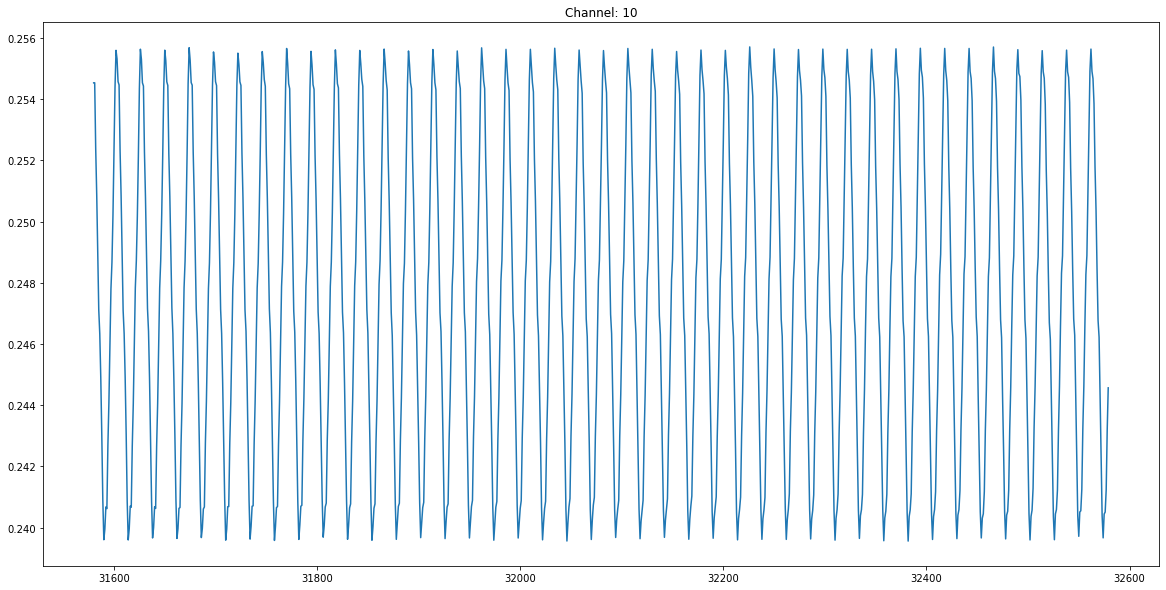

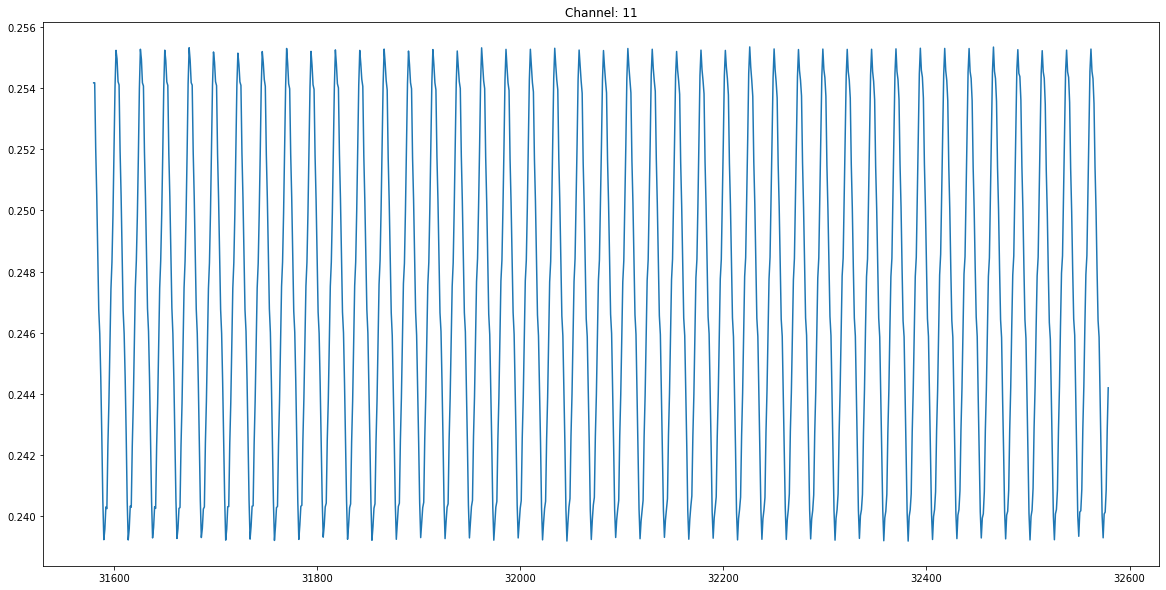

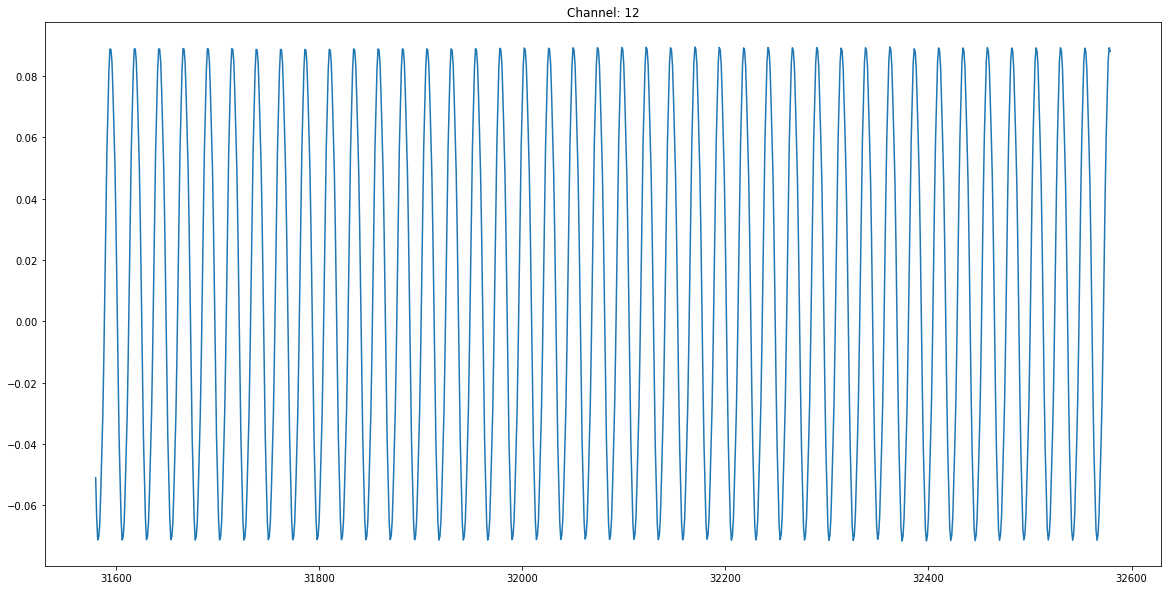

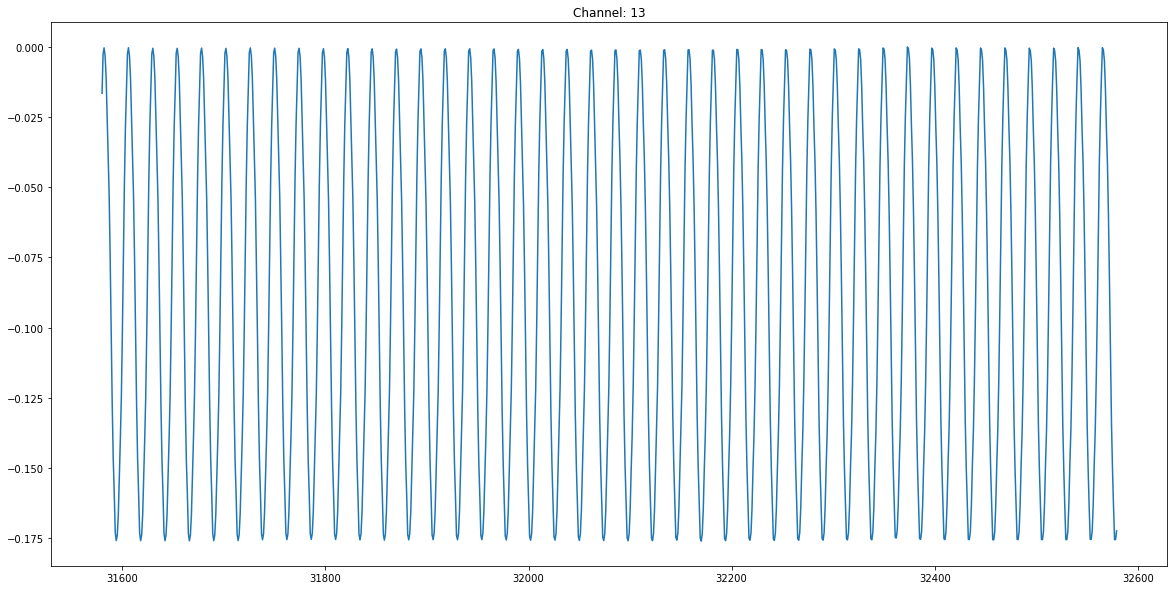

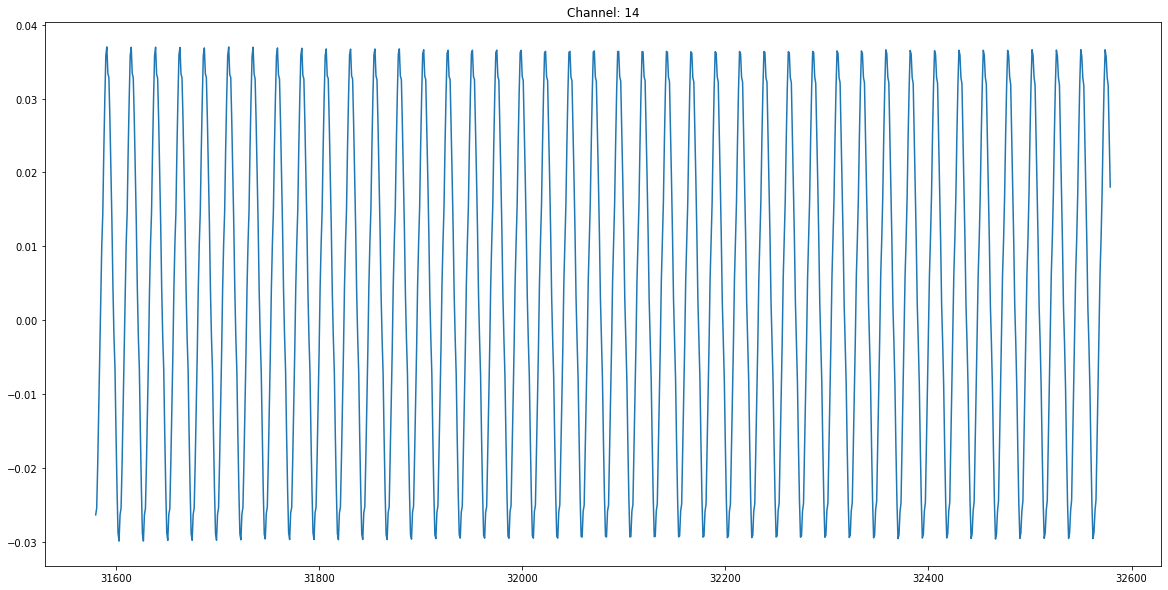

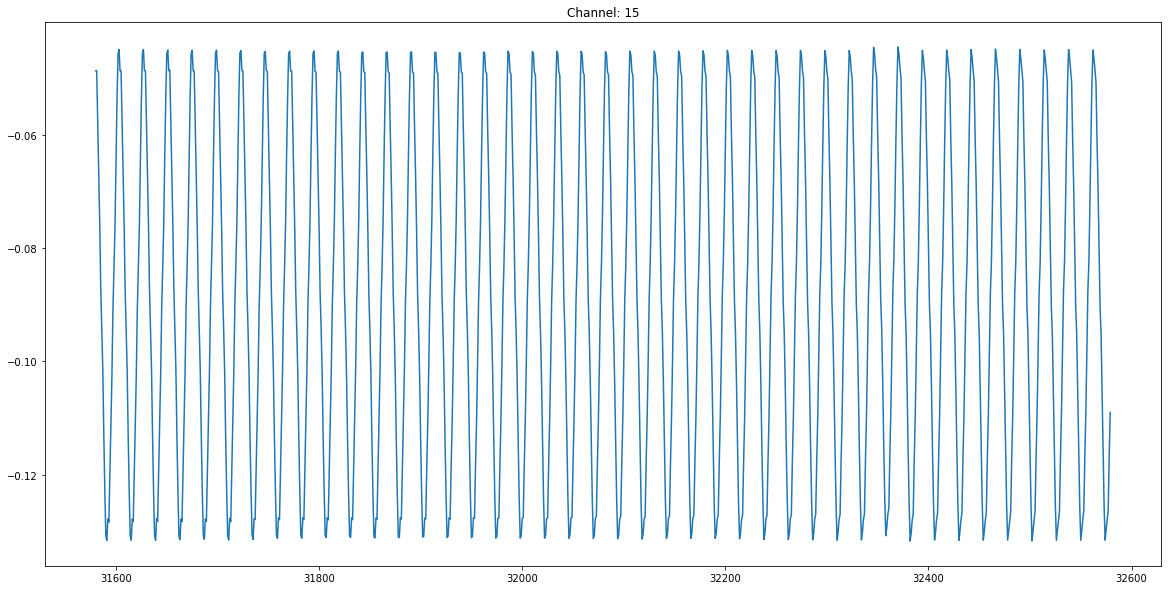

In [19]:
plt.rcParams['figure.figsize'] = [20, 10]


for column in data_pd:
    plt.figure()
    plt.title(f'Channel: {column}')
    data_pd[column].iloc[start_trigger:start_trigger+1000].plot() 


In [20]:
# TODO find the average time between cue_on and cue_off to see how long each timeframe lasts for. 

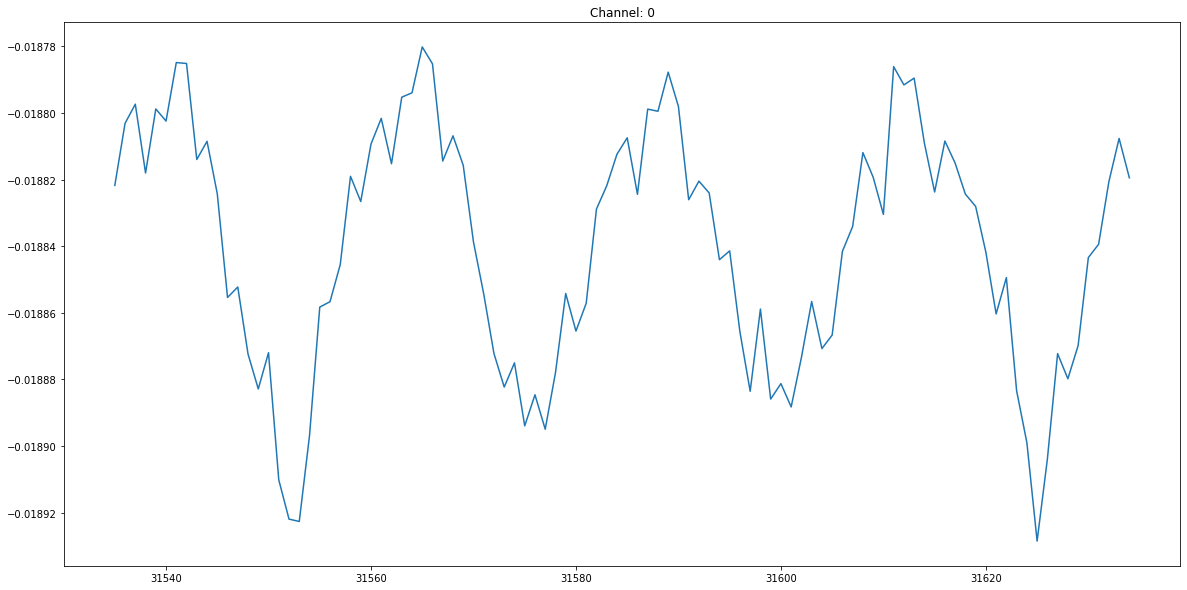

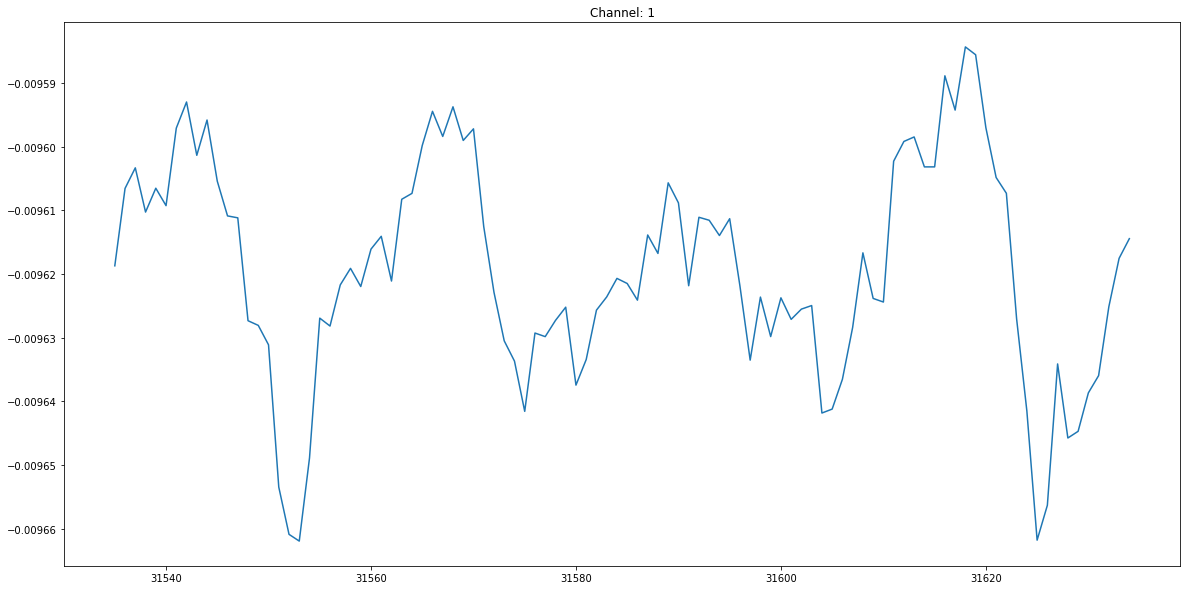

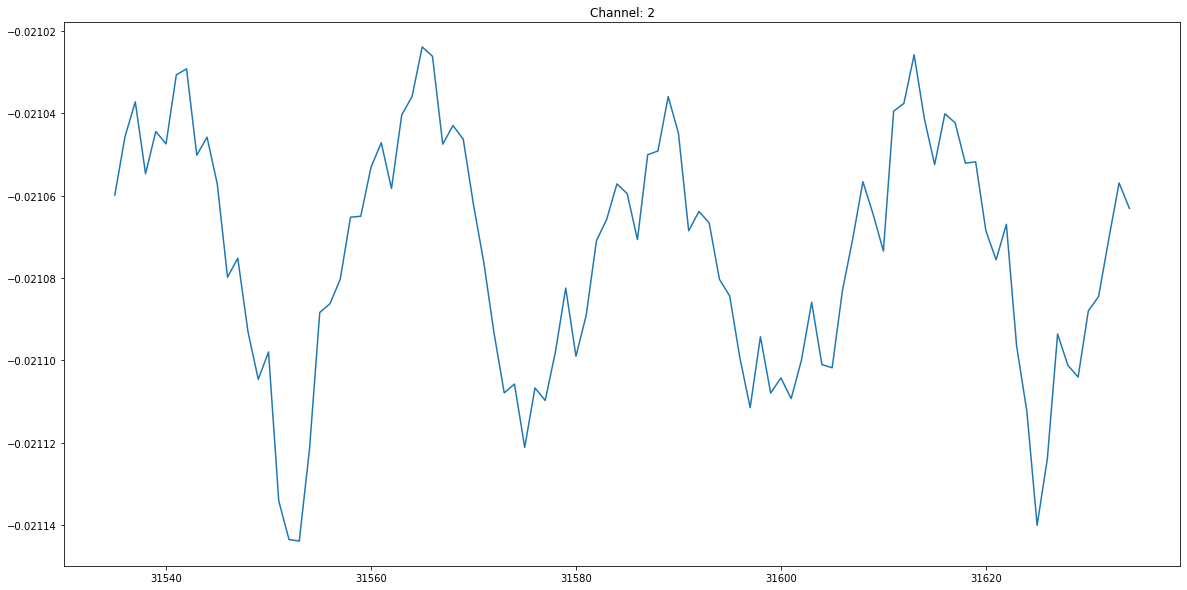

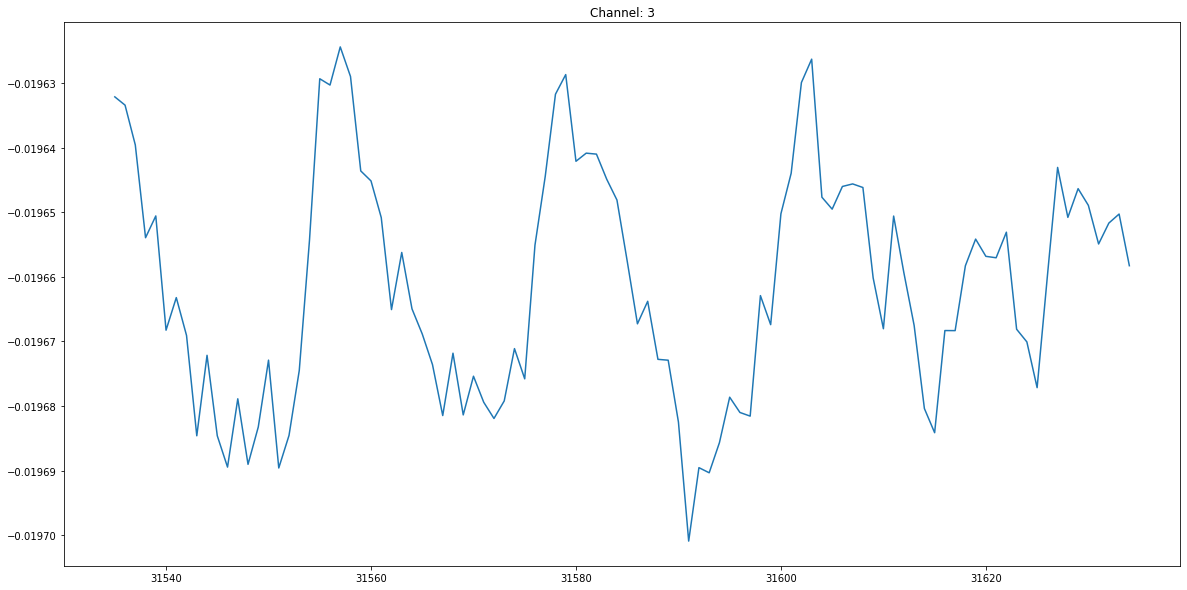

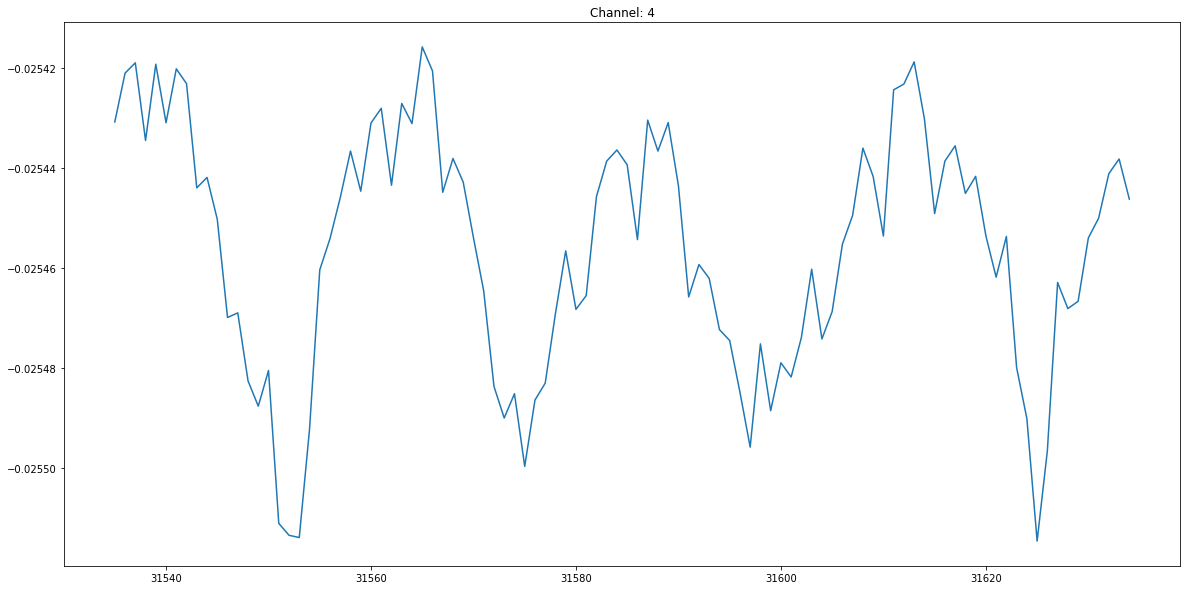

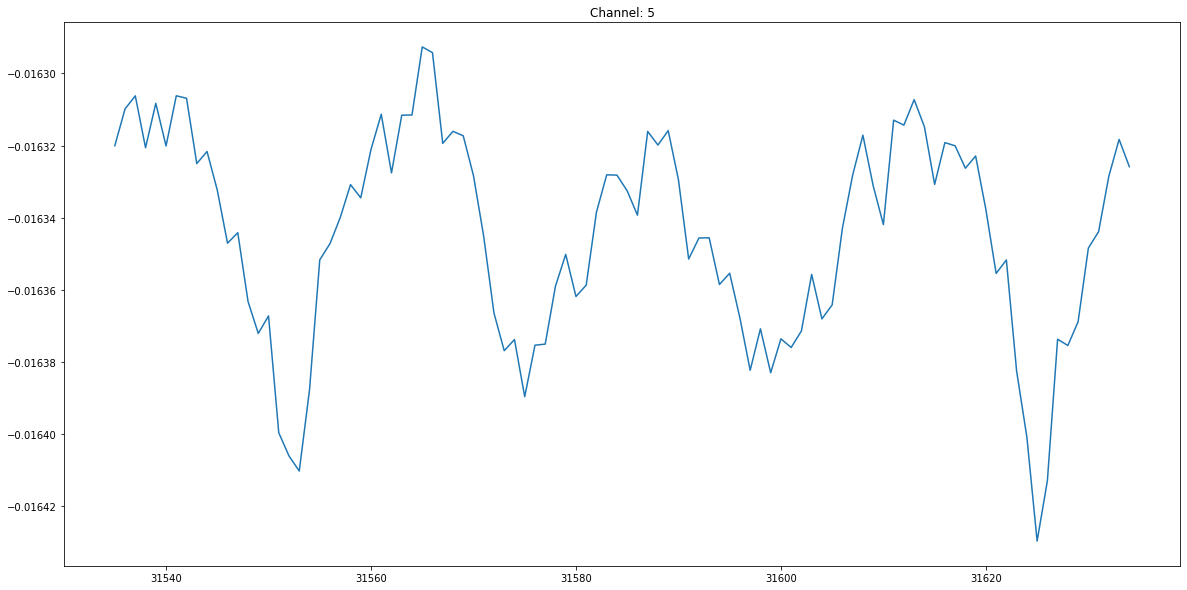

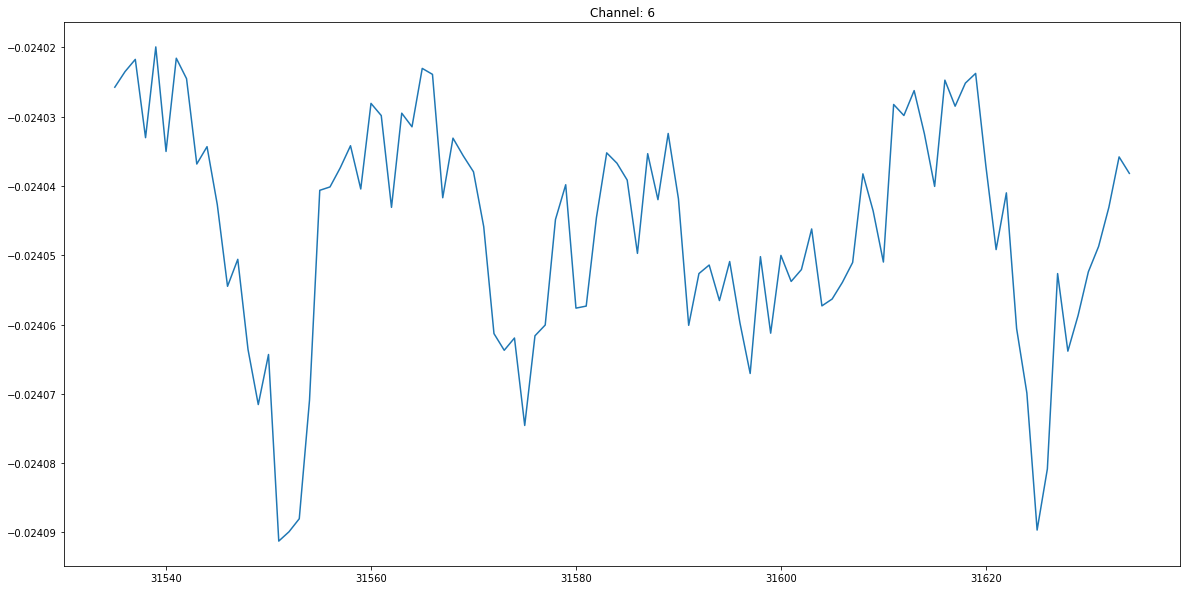

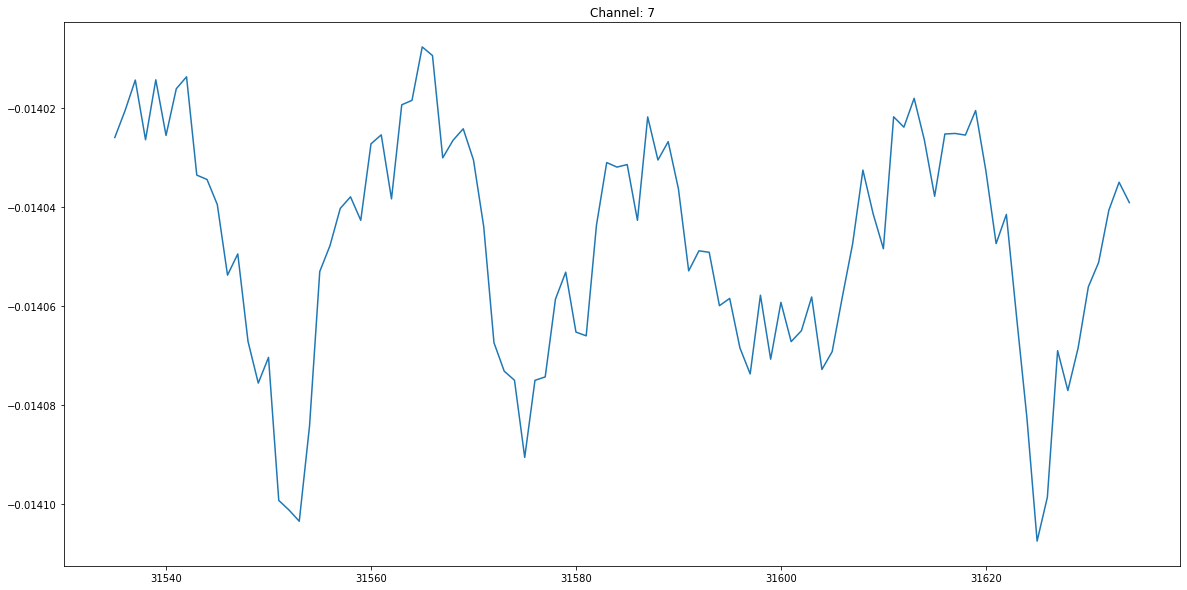

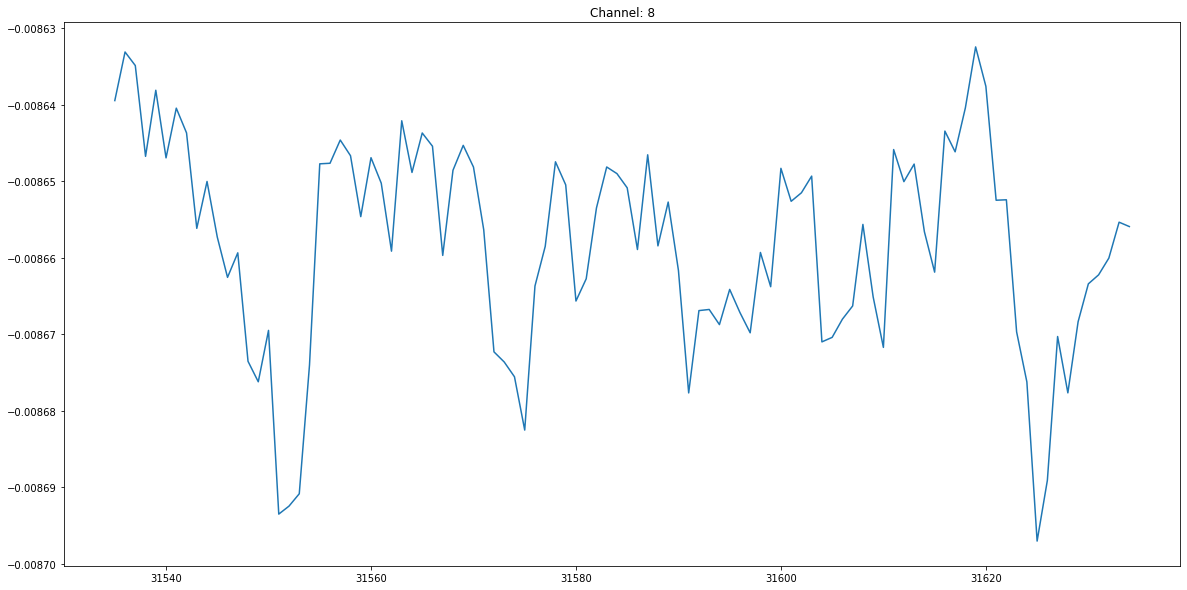

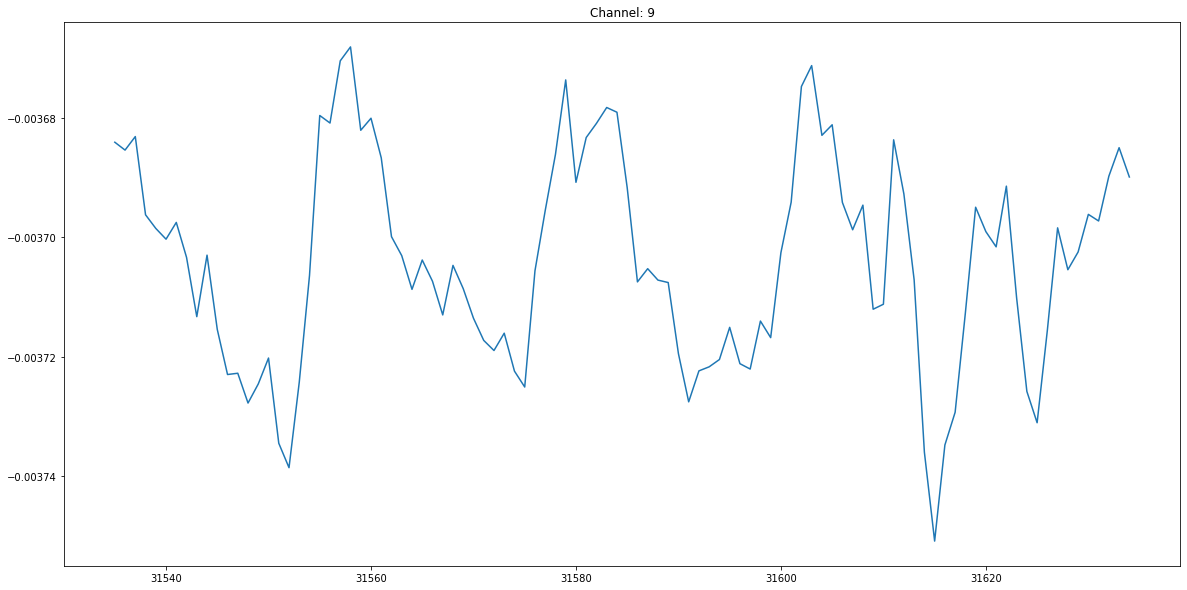

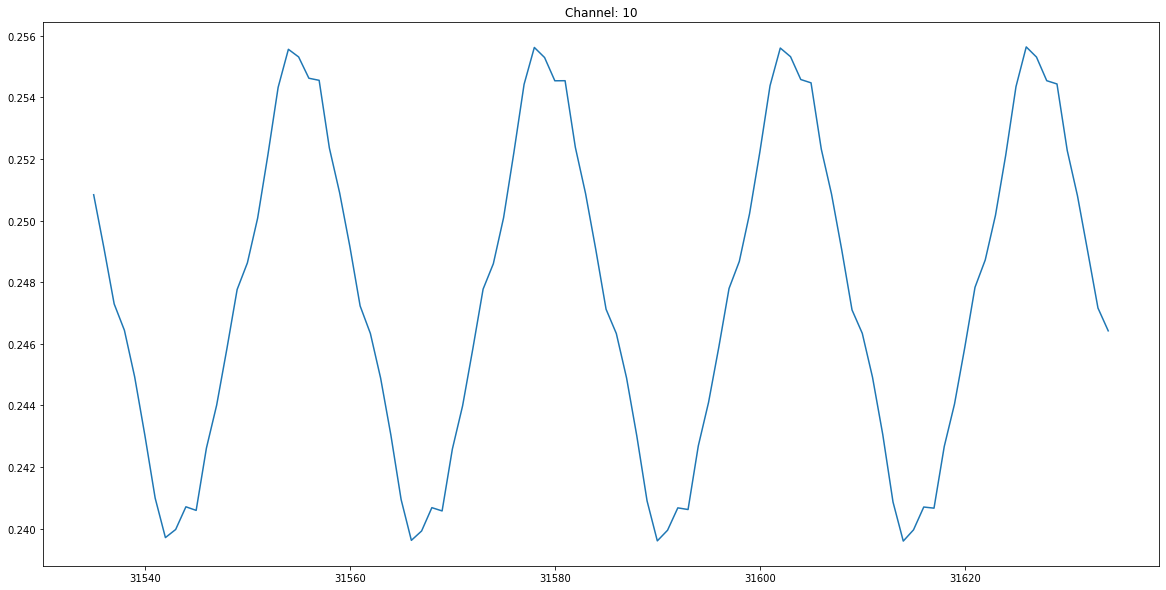

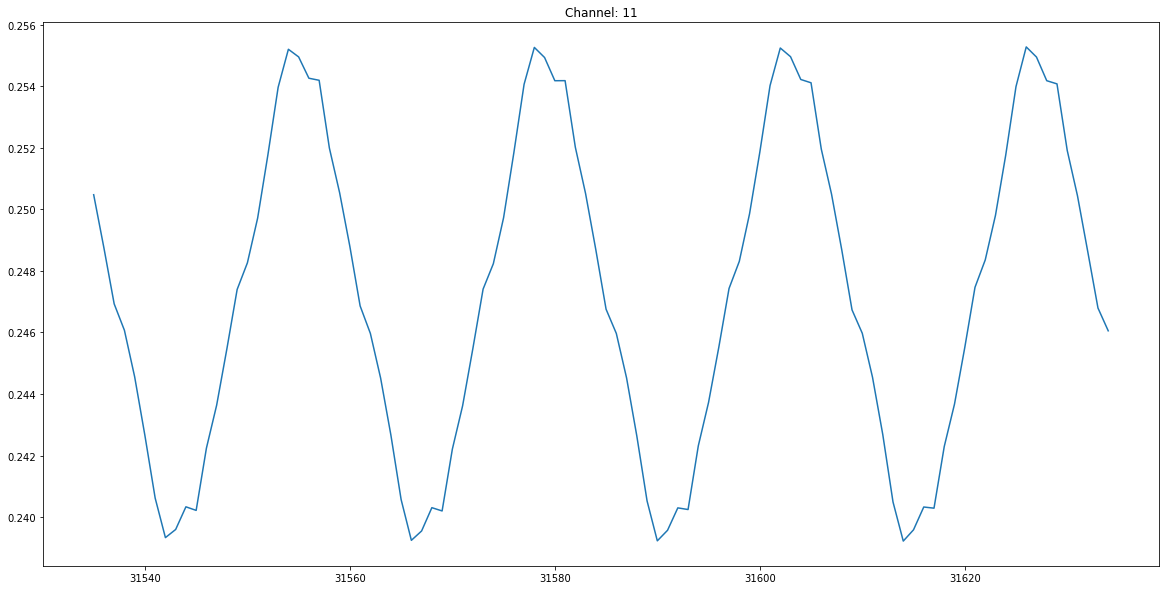

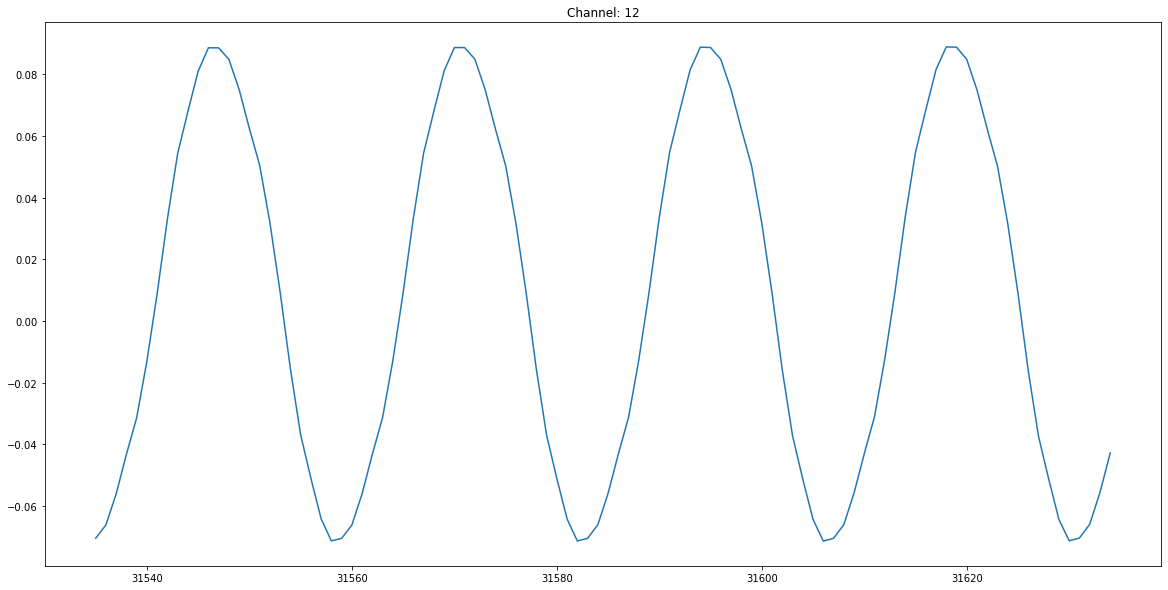

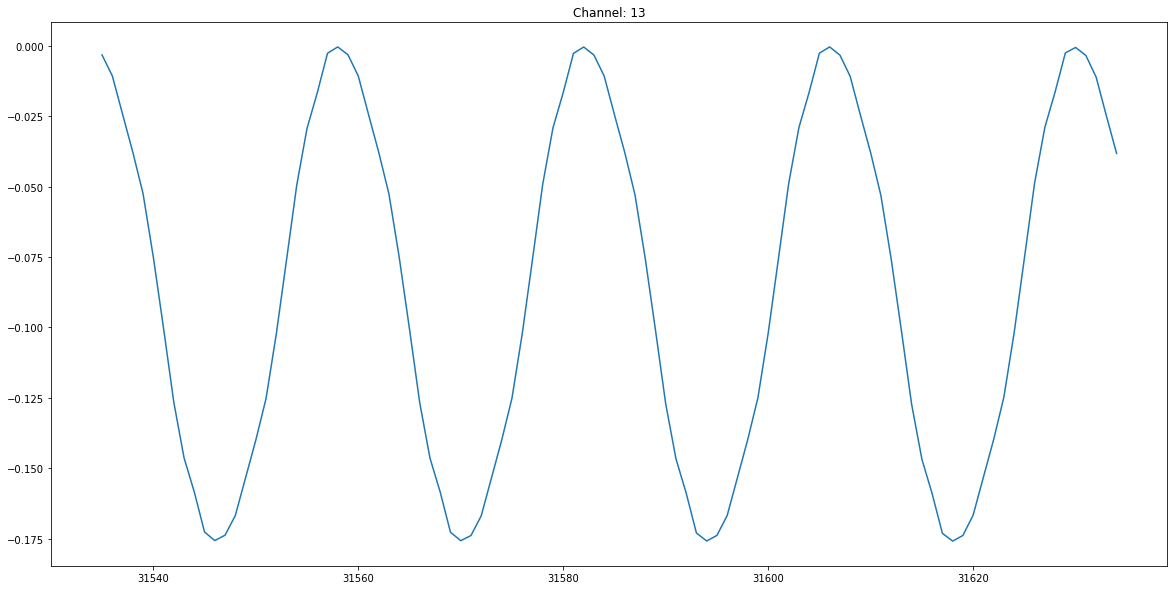

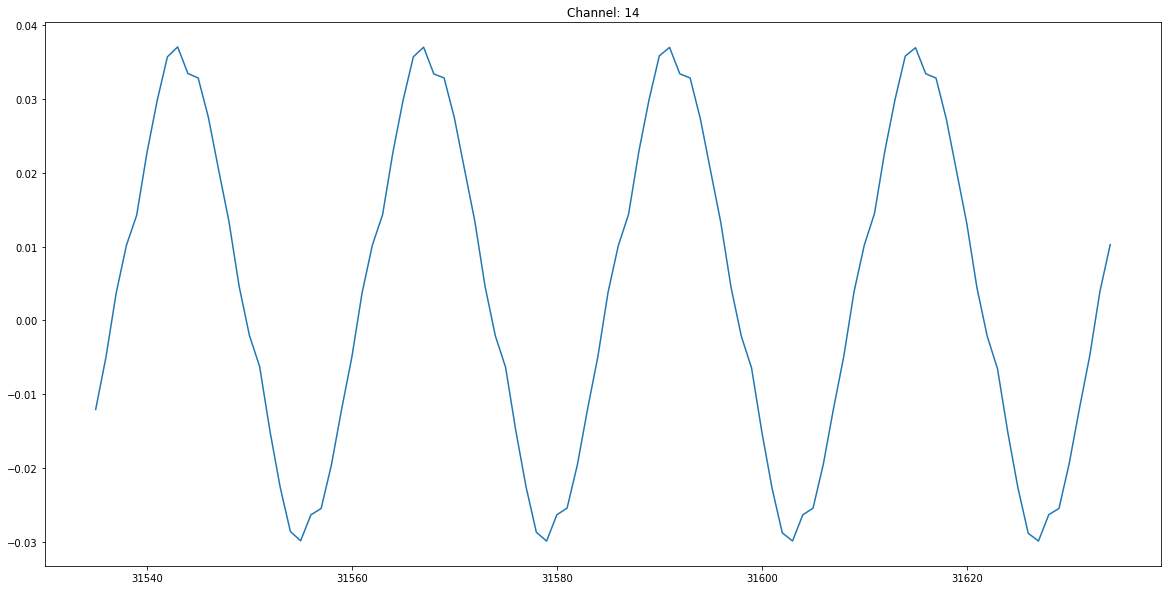

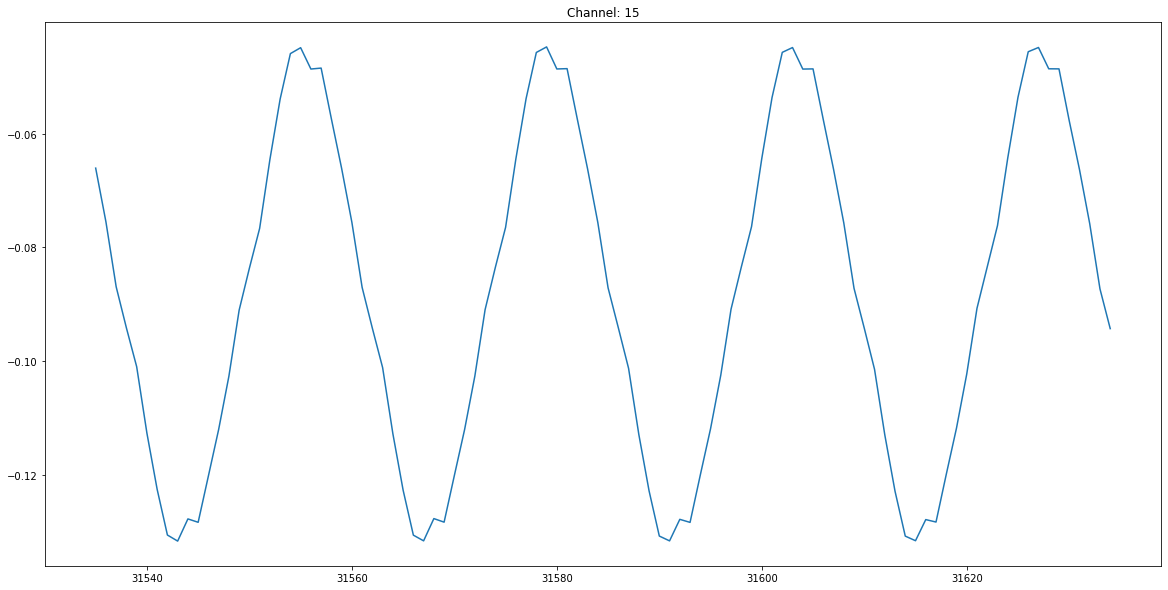

In [21]:
#zoomed version

middle = int((start+end)/2)
for column in data_pd:
    plt.figure()
    plt.title(f'Channel: {column}')
    data_pd[column].iloc[(middle-50):(middle+50)].plot() 

### Load Dates 
- Load in all date objects and covert them to python datetime objects

In [22]:
import datetime
import math

In [23]:
def covert_trigger_points_to_pd(trigger_point_inp):
    trigger_point_lst = []

    for t_p in trigger_point_inp:
        temp = []
        for x in t_p[1:-1]:
            temp.append(int(x))

        # hacky fix
        time_str = str(t_p[-1]).split('.')
        temp.append(int(time_str[0]))
        temp.append(int(time_str[1][:3])*1000)


        timestamp = datetime.datetime(*temp)
        trigger_point_lst.append([int(t_p[0]), timestamp])

    return pd.DataFrame(columns=['Trigger', 'Date'], data=trigger_point_lst)

In [24]:
def trigger_time_table(trigger_points_pd, cue_set):
    time_start = convert_mat_date_to_python_date(cue_set['time_start_device1'])
    is_trigger_time_table = []
    prev_non_trigger_timestamp = 0
    
    tp_iter = trigger_points_pd.iterrows()
    for index, row in tp_iter:
        if row['Trigger'] == 1:
            _, tp = next(tp_iter)
            time_since_start = row['Date'] - time_start
            end_time = tp['Date'] - time_start
            
            # print(f'start: {time_since_start}, end: {end_time}')
            is_trigger_time_table.append([time_since_start.iloc[0][0], end_time.iloc[0][0]])
    
    return pd.DataFrame(columns=['start', 'end'], data=is_trigger_time_table) # in seconds from time start              

In [25]:
def convert_mat_date_to_python_date(date_lst):
    p_date_lst = []
    
    for date in date_lst:
        temp = []
        for num in date[:-1]:
            temp.append(int(num))
            
        time_str = str(date[-1]).split('.')
        temp.append(int(time_str[0]))
        temp.append(int(time_str[1][:3])*1000)
        
    
        timestamp = datetime.datetime(*temp)
        p_date_lst.append(timestamp)
    
    return pd.DataFrame(columns=['Date'], data=p_date_lst)

In [26]:
# Takes the triggers point and coverts them to a list that states when a trigger_point is activated and when it switches back to idle.
trigger_timestamps = covert_trigger_points_to_pd(trigger_points)
is_triggered_tb = trigger_time_table(trigger_timestamps, cue_set_01)

is_triggered_tb

start             end
0  00:00:26.317000 00:00:28.652000
1  00:00:37.828000 00:00:40.142000
2  00:00:49.302000 00:00:50.978000
3  00:00:59.727000 00:01:01.925000
4  00:01:10.245000 00:01:12.607000
5  00:01:20.607000 00:01:22.957000
6  00:01:32.033000 00:01:34.408000
7  00:01:42.474000 00:01:44.797000
8  00:01:51.956000 00:01:54.573000
9  00:02:03.390000 00:02:05.631000
10 00:02:13.673000 00:02:15.905000
11 00:02:23.644000 00:02:25.916000
12 00:02:33.982000 00:02:36.250000
13 00:02:43.721000 00:02:45.921000
14 00:02:53.432000 00:02:55.671000
15 00:03:04.007000 00:03:07.038000
16 00:03:16.257000 00:03:18.491000
17 00:03:26.017000 00:03:29.120000
18 00:03:36.522000 00:03:38.750000
19 00:03:46.480000 00:03:48.717000
20 00:03:56.693000 00:03:58.904000
21 00:04:07.011000 00:04:09.934000
22 00:04:17.343000 00:04:19.598000
23 00:04:26.932000 00:04:29.166000
24 00:04:36.756000 00:04:39.002000
25 00:04:47.572000 00:04:49.801000
26 00:04:58.526000 00:05:00.786000
27 00:05:09.328000 00:05:11.591000
28 00:05:19.745000 00:05:21.980000
29 00:05:30.331000 00:05:32.575000

In [27]:
convert_mat_date_to_python_date(cue_set_01['time_cue_on'])

Date
0  2017-10-24 13:25:25.077
1  2017-10-24 13:25:36.549
2  2017-10-24 13:25:48.128
3  2017-10-24 13:25:58.575
4  2017-10-24 13:26:08.994
5  2017-10-24 13:26:19.368
6  2017-10-24 13:26:30.843
7  2017-10-24 13:26:41.241
8  2017-10-24 13:26:51.118
9  2017-10-24 13:27:02.227
10 2017-10-24 13:27:12.499
11 2017-10-24 13:27:22.477
12 2017-10-24 13:27:32.817
13 2017-10-24 13:27:42.534
14 2017-10-24 13:27:52.285
15 2017-10-24 13:28:03.639
16 2017-10-24 13:28:15.052
17 2017-10-24 13:28:25.734
18 2017-10-24 13:28:35.034
19 2017-10-24 13:28:45.306
20 2017-10-24 13:28:55.515
21 2017-10-24 13:29:06.645
22 2017-10-24 13:29:16.185
23 2017-10-24 13:29:25.767
24 2017-10-24 13:29:35.588
25 2017-10-24 13:29:46.395
26 2017-10-24 13:29:57.355
27 2017-10-24 13:30:08.165
28 2017-10-24 13:30:18.578
29 2017-10-24 13:30:29.158

In [28]:
def is_triggered(freq, is_triggered_table):
    sample_rate = cue_set_01['sample_rate'][0][0]
    freq_in_sec = convert_freq_to_datetime(freq, sample_rate)
    
    for i, row in is_triggered_table.iterrows():
        if freq_in_sec > row['start'] and freq_in_sec < row['end']:
            return 1
    return 0

In [29]:
def convert_freq_to_datetime(freq, hz):
    time_in_seconds = (freq / hz)
    time_str = str(time_in_seconds).split('.')
    
    return datetime.timedelta(seconds=int(time_str[0]),microseconds=int(time_str[1][:3])*1000)

In [30]:
is_triggered(100, is_triggered_tb)

0

### Dividing and labelling the data

Cut the data in blocks of size x and give them a triggered or non-triggered label

In [143]:
def aggregate_data(device_data_pd, freq_size, is_triggered_table):
    list_of_dataframes = []
    counter = 0
    
    for i in range(0, device_data_pd.shape[0], freq_size):
        # the label for the frame is attached first. we base being 'triggered' whether the center frequency is recorded during the triggered timeframe.
        list_of_dataframes.append([is_triggered(i+freq_size/2, is_triggered_table), device_data_pd.iloc[i:i+freq_size]])
        
        # notebook cant handle all the data at once.

        
    return list_of_dataframes

In [32]:
labelled_data = aggregate_data(data_pd, freq_size=100, is_triggered_tb)

In [33]:
def data_distribution(labelled_data_lst):
    triggered = 0
    
    for frame in labelled_data_lst:
        if frame[0] == 1:
            triggered +=1
    # todo  counter = collections.Counter(features)

    idle = len(labelled_data_lst) - triggered
    return {
            'triggered': triggered, 
            'idle': idle, 
            'expected_triggered_percent': int(triggered/(triggered + idle)*100)
           }

In [34]:
data_distribution(labelled_data)

{'triggered': 28, 'idle': 373, 'expected_triggered_percent': 6}

In [63]:
def create_uniform_distribution(data_list):
    # returns the dataset with equal amount of samples, chosen by the least represented feature. 
    features = []

    for frame in data_list:
        features.append(frame[0])
    
    counter = collections.Counter(features)
    least_represented_feature = 99999999999
    feat_counter = {}
    for i in counter.keys():
        feat_counter[i] = 0
        if counter[i] < least_represented_feature:
            least_represented_feature = counter[i]
    
    random.shuffle(data_list)
    
    uniform_data_list = []
    for frame in data_list:
        if feat_counter[frame[0]] < least_represented_feature:
            uniform_data_list.append(frame)
            feat_counter[frame[0]] += 1
    
    return uniform_data_list

In [65]:
data_distribution(create_uniform_distribution(labelled_data))

{'triggered': 28, 'idle': 28, 'expected_triggered_percent': 50}

In [42]:
def z_score_normalization(data_list):
    z_scored_data = []
    for frame in data_list: 
        _temp = (frame[1] - frame[1].mean())/frame[1].std()
        z_scored_data.append([frame[0], _temp])
    
    return z_scored_data

In [75]:
def train_test_split_data(data, split_per=10):
    dd = data_distribution(data)['expected_triggered_percent']
    isAcceptableDistribution = True
    
    while isAcceptableDistribution:
        random.shuffle(data)
        test_size = int(len(data)/100*10)

        train_data = data[test_size:]
        test_data = data[:test_size]
        
        train_dd = data_distribution(train_data)['expected_triggered_percent']
        test_dd = data_distribution(test_data)['expected_triggered_percent']
        
        if train_dd < dd*1.25 and train_dd > dd*0.75:
            if test_dd < dd*1.25 and test_dd > dd*0.75:
                print(f'The Train and Test Data has an acceptable triggered distribution of {train_dd} and {test_dd} percent - Returning.')
                isAcceptableDistribution = False
            else:
                print(f'Test Data did not have an acceptable triggered distribution of {test_dd} percent - expected {dd*0.75}-{dd*1.25} percent, trying again.')
        else:
            print(f'Training Data did not have an acceptable triggered distribution of {train_dd} percent - expected {dd*0.75}-{dd*1.25} percent, trying again.')
            
    return train_data, test_data
    

In [44]:
train_data, test_data = train_test_split_data(labelled_data)

Test Data did not have an acceptable triggered distribution of 0 percent - expected 3.0-9.0 percent, trying again.
The Train and Test Data has an acceptable triggered distribution of 7 and 5 percent - Returning.


In [83]:
def format_dataset(data, channel=0):
    # takes in list of dataframes on the usual format [target_value, pd.DataFrame] and returns these are seperate vectors for downstream prediction
    y = []
    x = []
    
    for frame in data:
        y.append(frame[0])
        x.append(frame[1][channel])
    
    # data, target
    return x, y 

In [276]:
## KNN predictions

# increase data points
labelled_data = aggregate_data(device_data_pd=data_pd.iloc[10:], freq_size=200, is_triggered_table=is_triggered_tb) 
uniform_data = create_uniform_distribution(labelled_data)
# z_normalised = z_score_normalization(uniform_data)

train_data, test_data = train_test_split_data(uniform_data, split_per=20)

The Train and Test Data has an acceptable triggered distribution of 49 and 51 percent - Returning.


In [267]:
x_train, y_train = format_dataset(train_data, channel=0)
x_test, y_test = format_dataset(test_data, channel=0)

In [268]:
data_distribution(uniform_data)

{'triggered': 840, 'idle': 840, 'expected_triggered_percent': 50}

In [269]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [270]:
neigh.score(x_train, y_train)

0.7890211640211641

In [271]:
neigh.score(x_test, y_test)

0.5178571428571429

In [272]:
def channel_accuracy(train_data, test_data):
    channels = len(train_data[0][1].columns)
    score_dict = {}
    ensemble_predictions_train = []
    ensemble_predictions_test = []

    neigh = KNeighborsClassifier(n_neighbors=2)
    _, y_train = format_dataset(train_data, channel=0)
    _, y_test = format_dataset(test_data, channel=0)
    
    for channel in range(channels):
        x_train, _ = format_dataset(train_data, channel=channel)
        x_test, _ = format_dataset(test_data, channel=channel)
        
        neigh.fit(x_train, y_train)
        
        train_preds = neigh.predict(x_train)
        test_preds = neigh.predict(x_test)
    
        ensemble_predictions_train.append(train_preds)
        ensemble_predictions_test.append(test_preds)
        
        train_score = neigh.score(x_train, y_train)
        test_score = neigh.score(x_test, y_test)
        
        score_dict[channel] = {'train_score': train_score, 'test_score': test_score}
    
    ensemble_preds_train = combine_predictions(ensemble_predictions_train).astype(int)
    ensemble_preds_test = combine_predictions(ensemble_predictions_test).astype(int)

    score_dict['ensemble'] = {'train_score': get_accuracy(ensemble_preds_train, y_train), 'test_score': get_accuracy(ensemble_preds_test, y_test)}
    return score_dict

In [273]:
def get_accuracy(preds, targets):
    counter = 0
    for pred, target in zip(preds, targets): 
        if pred == target:
            counter += 1
    
    return (counter/len(preds))*100

In [274]:
def combine_predictions(all_channel_predictions):
    channel_lst = []
    c_df = pd.DataFrame()
    counter = 0 
    
    for channel in all_channel_predictions:
        c_df[counter] = channel
        counter += 1 
    
    most_frequent_pred = c_df.mode(axis=1)
    return most_frequent_pred[0].to_numpy()

In [277]:
pd.DataFrame.from_dict(channel_accuracy(train_data, test_data))

0         1         2         3         4         5  \
train_score  0.833997  0.803453  0.844622  0.833997  0.856574  0.782205   
test_score   0.602410  0.614458  0.614458  0.638554  0.674699  0.530120   

                    6         7         8         9        10        11  \
train_score  0.855246  0.816733  0.840637  0.791501  0.808765  0.807437   
test_score   0.638554  0.566265  0.602410  0.566265  0.590361  0.578313   

                   12        13        14        15   ensemble  
train_score  0.779548  0.783533  0.844622  0.833997  84.329349  
test_score   0.518072  0.506024  0.578313  0.602410  59.036145